In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [83]:
# Creating a sample dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100) # Normal data with mean=50, std=10
outliers = np.array([10, 110, 5, 120]) #Outliers
data = np.concatenate([data,outliers])

In [84]:
# Creating a DataFrame
df = pd.DataFrame(data, columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [85]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


## Scatter Plot
- A scatter plot helps visually identify extreme values.

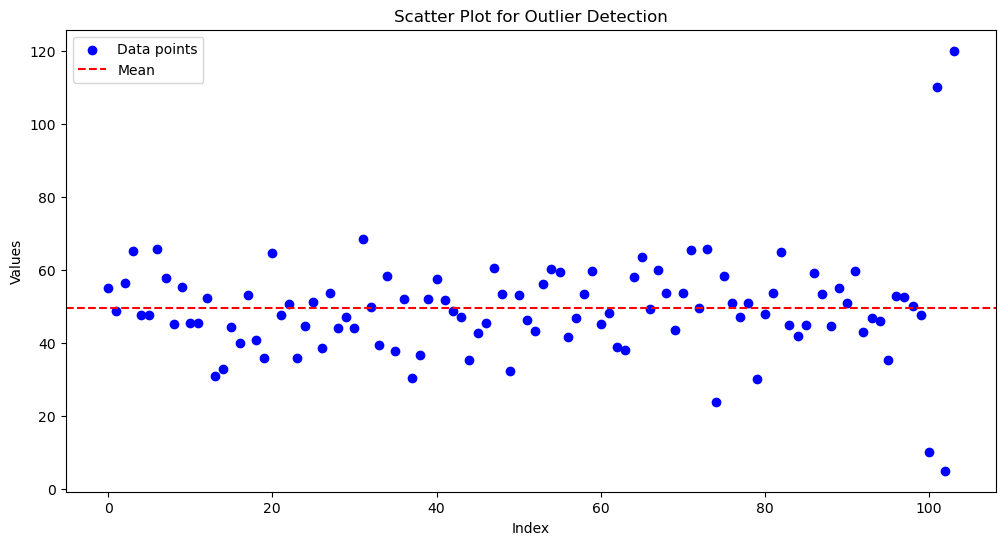

In [87]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(df)), df['Values'], color='blue', label='Data points')
plt.axhline(y=df['Values'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

## Box plot
- A box plot is useful for spotting extreme values using quartiles

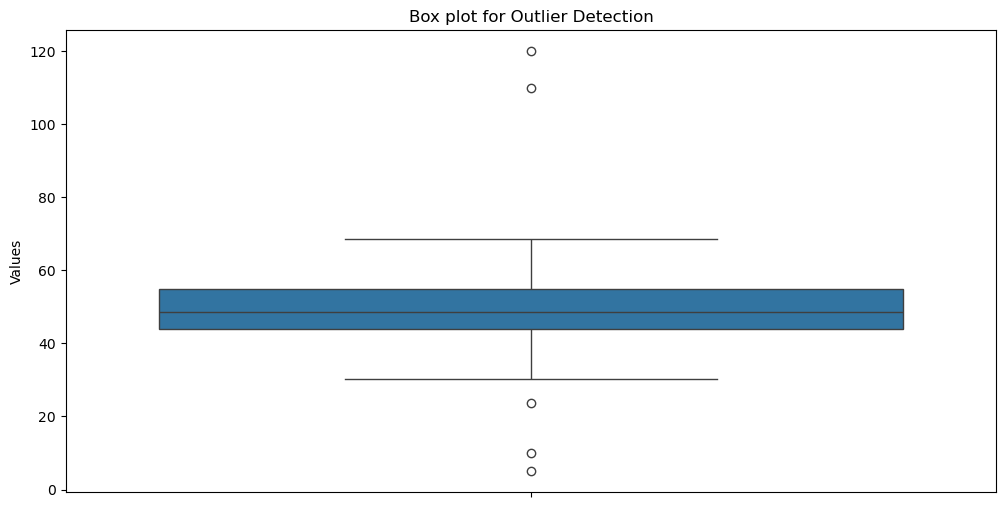

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='Values')
plt.title("Box plot for Outlier Detection")
plt.show()

## Z-Score Method

In [91]:
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x : 'Outlier' if abs(x) > 3 else 'Normal')
df[df['Outlier_Z'] == 'Outlier']

,Values,Z-score,Outlier_Z
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


## Inter Quartile Range (IQR) Method

In [93]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
df['Outlier_IQR'] = df['Values'].apply(lambda x : 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
df[df['Outlier_IQR'] == 'Outlier']

,Values,Z-score,Outlier_Z,Outlier_IQR
74,23.802549,-1.831694,Normal,Outlier
100,10.000000,-2.818056,Normal,Outlier
101,110.000000,4.328173,Outlier,Outlier
102,5.000000,-3.175368,Outlier,Outlier
103,120.000000,5.042796,Outlier,Outlier


## Final Summary 

## Finding Outliers Using the IQR Method with a 5-Number Summary

*Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR*

In [97]:
import numpy as np

# Step 1 : Create a dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100) # Normal data with mean=50, std=10
outliers = np.array([10, 110, 5, 120]) #Outliers
data = np.concatenate([data,outliers])

# Step 2 : Compute the 5-number summary
Q1 = np.percentile(data, 25)
Q2 = np.median(data)
Q3 = np.percentile(data, 75)
min_value = np.min(data)
max_value = np.max(data)

# Step 3 : Compute IQR
IQR = Q3 - Q1

# Step 4 : Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5 : Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6 : Print Results
print(f"5-Number Summary : \n    Min : {min_value}\n    Q1 : {Q1}\n    Median(Q2) : {Q2}\n    Q3 : {Q3}\n    Max : {max_value}")
print(f"IQR : {IQR}")
print(f"Lower Bound : {lower_bound}\nUpper Bound : {upper_bound}")
print(f"Outliers : {outliers}")

5-Number Summary : 
    Min : 5.0
    Q1 : 43.874401021766715
    Median(Q2) : 48.73043708220287
    Q3 : 55.00852473036764
    Max : 120.0
IQR : 11.134123708600924
Lower Bound : 27.17321545886533
Upper Bound : 71.70971029326903
Outliers : [ 23.80254896  10.         110.           5.         120.        ]
